
##Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')
train

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082
...,...,...,...,...,...,...
1495,23-07-2021,299.658540,301.995035,298.400415,71447400,301.675507
1496,26-07-2021,301.096392,304.211720,299.958083,72434100,302.534241
1497,27-07-2021,302.793811,302.973565,295.664509,104818600,298.100861
1498,28-07-2021,294.186727,298.500271,289.653510,118931200,294.526215


In [ ]:
test = pd.read_csv('test.csv')
test

,Date,Open,High,Low,Volume,Close
0,30-07-2021,293.328006,297.222166,292.788806,70382000,NaN
1,02-08-2021,297.282094,298.460321,295.065414,62880000,NaN
2,03-08-2021,296.183715,300.637034,294.925590,64786600,NaN
3,04-08-2021,299.099384,300.137807,297.122335,56368300,NaN
4,05-08-2021,298.520228,300.237657,296.902657,46397700,NaN
5,06-08-2021,297.700012,299.220001,296.260010,54067400,NaN
6,09-08-2021,297.399994,298.399994,296.040008,48908700,NaN
7,10-08-2021,297.880005,300.420013,295.600006,69023100,NaN
8,11-08-2021,297.100006,298.440002,296.059998,48493500,NaN
9,12-08-2021,297.380005,303.100006,296.679993,72282600,NaN


In [ ]:
train.describe()

,Open,High,Low,Volume,Close
count,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,117.962567,119.188406,116.766942,1.344507e+08,118.034245
std,69.605960,70.483358,68.640370,6.474265e+07,69.597154
min,46.975433,47.754310,46.728239,4.544800e+07,47.133999
25%,67.216725,67.603262,67.013241,9.138162e+07,67.464885
50%,91.015663,92.208971,90.564149,1.160496e+08,90.918922
75%,142.914154,144.374118,141.944432,1.581502e+08,143.038712
max,303.033493,304.551208,299.958083,6.488252e+08,302.853729


In [ ]:
test.describe()

,Open,High,Low,Volume,Close
count,30.000000,30.000000,30.000000,3.000000e+01,0.0
mean,303.593781,306.227833,301.194158,6.983382e+07,NaN
std,7.084465,6.845061,6.257834,2.033028e+07,NaN
min,293.328006,297.222166,292.788806,4.639770e+07,NaN
25%,297.745010,300.474269,296.365006,5.660265e+07,NaN
50%,301.889999,304.630005,299.339996,6.383330e+07,NaN
75%,309.105003,311.635010,303.269989,8.178715e+07,NaN
max,318.959992,319.519989,313.779999,1.406464e+08,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    30 non-null     object 
 1   Open    30 non-null     float64
 2   High    30 non-null     float64
 3   Low     30 non-null     float64
 4   Volume  30 non-null     int64  
 5   Close   0 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
train.info()
# Date isn't datetime data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1500 non-null   object 
 1   Open    1500 non-null   float64
 2   High    1500 non-null   float64
 3   Low     1500 non-null   float64
 4   Volume  1500 non-null   int64  
 5   Close   1500 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 70.4+ KB


In [ ]:
train.isnull().any()
# There is no NaN value in Train dataset.

Date      False
Open      False
High      False
Low       False
Volume    False
Close     False
dtype: bool

In [ ]:
test.isnull().any()
# NaN values are only in Close which we have to calculate and replace them.

Date      False
Open      False
High      False
Low       False
Volume    False
Close      True
dtype: bool

<ipython-input-2300-6ac3fb5eb1ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=train.corr()


<Axes: >

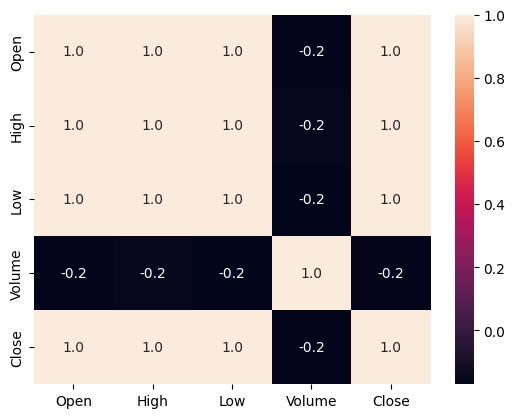

In [ ]:
cor=train.corr()
sns.heatmap(cor, annot=True, fmt=".1f")
# Volume has negetive correlation with others and
# Others have positive correlation with each other.

In [ ]:
train['Date'] = pd.to_datetime(train['Date'], format = "%d-%m-%Y")
train.info()
#convert Date to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1500 non-null   datetime64[ns]
 1   Open    1500 non-null   float64       
 2   High    1500 non-null   float64       
 3   Low     1500 non-null   float64       
 4   Volume  1500 non-null   int64         
 5   Close   1500 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 70.4 KB


In [ ]:
train = train[['Date', 'Close']]
train

,Date,Close
0,2015-08-14,58.237720
1,2015-08-17,58.788651
2,2015-08-18,58.485638
3,2015-08-19,57.801575
4,2015-08-20,56.718082
...,...,...
1495,2021-07-23,301.675507
1496,2021-07-26,302.534241
1497,2021-07-27,298.100861
1498,2021-07-28,294.526215


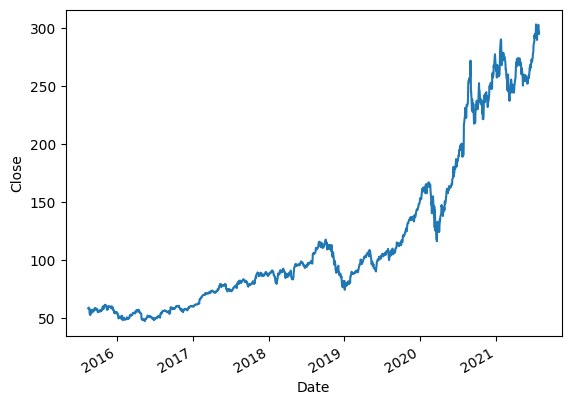

In [ ]:
plt.plot(train['Date'], train['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.gcf().autofmt_xdate()

In [ ]:
from copy import deepcopy as dc
#preparing the dataframe to predict the current Close from 7 days layter.
def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(train, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2015-08-25,52.627464,52.342827,53.554852,56.718082,57.801575,58.485638,58.788651,58.237720
2015-08-26,55.359142,52.627464,52.342827,53.554852,56.718082,57.801575,58.485638,58.788651
2015-08-27,56.842045,55.359142,52.627464,52.342827,53.554852,56.718082,57.801575,58.485638
2015-08-28,57.011913,56.842045,55.359142,52.627464,52.342827,53.554852,56.718082,57.801575
2015-08-31,56.768593,57.011913,56.842045,55.359142,52.627464,52.342827,53.554852,56.718082
...,...,...,...,...,...,...,...,...
2021-07-23,301.675507,298.160767,295.364960,296.862701,289.473785,297.341980,301.515747,302.853729
2021-07-26,302.534241,301.675507,298.160767,295.364960,296.862701,289.473785,297.341980,301.515747
2021-07-27,298.100861,302.534241,301.675507,298.160767,295.364960,296.862701,289.473785,297.341980


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[ 52.62746429,  52.34282684,  53.55485153, ...,  58.48563766,
         58.78865051,  58.23772049],
       [ 55.3591423 ,  52.62746429,  52.34282684, ...,  57.80157471,
         58.48563766,  58.78865051],
       [ 56.84204483,  55.3591423 ,  52.62746429, ...,  56.71808243,
         57.80157471,  58.48563766],
       ...,
       [298.1008606 , 302.5342407 , 301.6755066 , ..., 296.8627014 ,
        289.4737854 , 297.34198   ],
       [294.5262146 , 298.1008606 , 302.5342407 , ..., 295.3649597 ,
        296.8627014 , 289.4737854 ],
       [295.8442383 , 294.5262146 , 298.1008606 , ..., 298.1607666 ,
        295.3649597 , 296.8627014 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Scaling the dataset
scaler = MinMaxScaler()
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[0.02148237, 0.02036928, 0.02510895, ..., 0.04439094, 0.04557588,
        0.04342145],
       [0.03216468, 0.02148237, 0.02036928, ..., 0.04171589, 0.04439094,
        0.04557588],
       [0.03796362, 0.03216468, 0.02148237, ..., 0.03747886, 0.04171589,
        0.04439094],
       ...,
       [0.98141376, 0.99875063, 0.99539252, ..., 0.9765719 , 0.94767731,
        0.97844613],
       [0.96743499, 0.98141376, 0.99875063, ..., 0.97071493, 0.9765719 ,
        0.94767731],
       [0.97258917, 0.96743499, 0.98141376, ..., 0.98164802, 0.97071493,
        0.9765719 ]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((1493, 7), (1493,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[0.04342145, 0.04557588, 0.04439094, ..., 0.03747886, 0.02510895,
        0.02036928],
       [0.04557588, 0.04439094, 0.04171589, ..., 0.02510895, 0.02036928,
        0.02148237],
       [0.04439094, 0.04171589, 0.03747886, ..., 0.02036928, 0.02148237,
        0.03216468],
       ...,
       [0.97844613, 0.94767731, 0.9765719 , ..., 0.98164802, 0.99539252,
        0.99875063],
       [0.94767731, 0.9765719 , 0.97071493, ..., 0.99539252, 0.99875063,
        0.98141376],
       [0.9765719 , 0.97071493, 0.98164802, ..., 0.99875063, 0.98141376,
        0.96743499]])

##splitting train dataset


In [ ]:
split_index = int(len(X) * 0.95)

split_index

1418

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1418, 7), (75, 7), (1418,), (75,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1418, 7, 1), (75, 7, 1), (1418, 1), (75, 1))

##made the tensors and build the model



In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1418, 7, 1]),
 torch.Size([75, 7, 1]),
 torch.Size([1418, 1]),
 torch.Size([75, 1]))

In [ ]:
from torch.utils.data import Dataset

class stock_dataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = stock_dataset(X_train, y_train)
test_dataset = stock_dataset(X_test, y_test)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 20

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([20, 7, 1]) torch.Size([20, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers


        self.lstm_layers = nn.ModuleList([nn.LSTM(input_size, hidden_size, batch_first=True) for _ in range(num_stacked_layers)])
        self.relu = nn.ReLU()

        self.fc = nn.Linear(hidden_size, 1)


        self.h0 = nn.Parameter(torch.zeros(num_stacked_layers, 1, hidden_size))
        self.c0 = nn.Parameter(torch.zeros(num_stacked_layers, 1, hidden_size))

    def forward(self, x):
        batch_size = x.size(0)


        h0 = self.h0.expand(-1, batch_size, -1).contiguous()
        c0 = self.c0.expand(-1, batch_size, -1).contiguous()

        for lstm_layer in self.lstm_layers:
            x, _ = lstm_layer(x, (h0, c0))
            x = self.relu(x)

        out = self.fc(x[:, -1, :])
        return out

model = LSTM(1, 100, 1)
model.to(device)
model

LSTM(
  (lstm_layers): ModuleList(
    (0): LSTM(1, 100, batch_first=True)
  )
  (relu): ReLU()
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = torch.sqrt(loss_function(output, y_batch))
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 20 == 19:  # print every 20 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = torch.sqrt(loss_function(output, y_batch))
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()


In [ ]:
learning_rate = 0.001
num_epochs = 150
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 20, Loss: 0.049
Batch 40, Loss: 0.031
Batch 60, Loss: 0.010

Val Loss: 0.089
***************************************************

Epoch: 2
Batch 20, Loss: 0.007
Batch 40, Loss: 0.005
Batch 60, Loss: 0.004

Val Loss: 0.054
***************************************************

Epoch: 3
Batch 20, Loss: 0.004
Batch 40, Loss: 0.004
Batch 60, Loss: 0.004

Val Loss: 0.029
***************************************************

Epoch: 4
Batch 20, Loss: 0.004
Batch 40, Loss: 0.004
Batch 60, Loss: 0.004

Val Loss: 0.031
***************************************************

Epoch: 5
Batch 20, Loss: 0.004
Batch 40, Loss: 0.003
Batch 60, Loss: 0.004

Val Loss: 0.031
***************************************************

Epoch: 6
Batch 20, Loss: 0.003
Batch 40, Loss: 0.003
Batch 60, Loss: 0.003

Val Loss: 0.032
***************************************************

Epoch: 7
Batch 20, Loss: 0.004
Batch 40, Loss: 0.004
Batch 60, Loss: 0.004

Val Loss: 0.033
**************************************

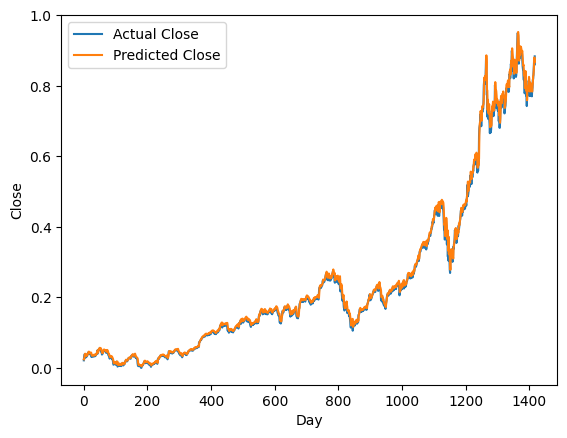

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


##Testing our model

In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 53.3866093 ,  53.22144608,  55.23994093, ..., 267.15754655,
       272.21096794, 268.97364082])

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 52.62746446,  55.3591426 ,  56.84204492, ..., 270.15167098,
       266.64291283, 273.00253507])

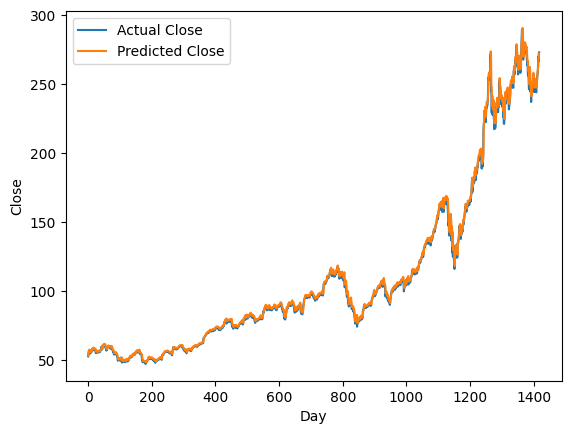

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([274.76115145, 270.63618634, 275.01269156, 274.70464904,
       275.81907399, 272.63061299, 273.29655487, 270.52252612,
       274.90707916, 275.83430083, 275.02631798, 273.45854773,
       273.30289558, 269.58804921, 271.55563455, 262.93443766,
       263.07827721, 266.45241727, 267.7502807 , 261.29356639,
       259.28167231, 253.58655919, 257.526775  , 262.45975345,
       260.19676129, 257.23438611, 256.93515352, 261.92442099,
       258.63153647, 261.42480073, 261.28664648, 261.08452121,
       258.18375453, 256.86157998, 256.30088469, 257.76484111,
       254.97276573, 259.14155183, 259.41208357, 260.81420285,
       261.60455062, 259.70881646, 261.95339619, 267.98206707,
       266.52477144, 267.23096767, 270.43369526, 268.04654108,
       271.35654246, 274.72857912, 274.15213875, 273.50025008,
       273.00107183, 276.18563086, 279.20220689, 280.30763901,
       280.79919621, 285.8647503 , 289.79162929, 294.42616774,
       291.8333064 , 295.25276118, 294.30560286, 296.38

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([268.2178621 , 273.14212208, 272.46429137, 273.8199223 ,
       270.37100457, 271.14847277, 268.03844753, 272.78326246,
       273.58071304, 272.92278849, 271.30798118, 271.10861472,
       267.08151903, 269.23458529, 259.8845272 , 260.38294334,
       263.65246174, 265.03042232, 258.32044554, 256.44327624,
       250.17266777, 254.5660917 , 259.51865622, 257.16218436,
       254.32644042, 254.00692062, 259.23907068, 255.48471684,
       258.81969999, 258.42031167, 258.32044554, 255.18514893,
       253.84716834, 253.18814636, 254.74581111, 251.71036538,
       256.40334198, 256.42330911, 258.10079187, 258.87961662,
       256.8426798 , 259.31895444, 265.56958054, 263.89211302,
       264.91058905, 268.18567082, 265.52966153, 269.20416209,
       272.55911238, 271.99997178, 271.42083357, 270.82174347,
       274.15674186, 277.25210422, 278.51021629, 279.129304  ,
       284.50125446, 288.61507761, 293.70745777, 291.05141799,
       294.78583519, 293.56765738, 295.84424548, 302.85

In [ ]:
import torch.nn.functional as F

mse = F.mse_loss(y_test, model(X_test.to(device)).detach().cpu())

# Calculate RMSE
rmse = torch.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.015566355548799038


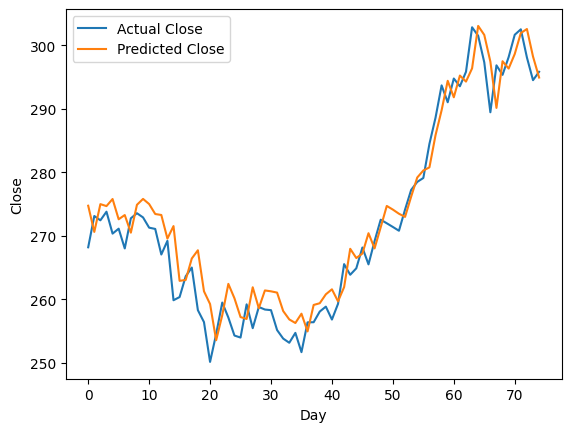

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
torch.save(model.state_dict(), "LSTM.pth")

##let's go

In [ ]:
x_df = train[:]['Close']

x_np = x_df.to_numpy()
x_np = x_np.reshape(-1, 1)
x_np = scaler.fit_transform(x_np)

In [ ]:
x = x_np[1493:]
x = dc(np.flip(x, axis=0))
tt = x

loaded_model = LSTM(1, 100, 1).to(device)
loaded_model.load_state_dict(torch.load('LSTM.pth', map_location=device))
loaded_model.eval()


for i in range(30):
    tt = x[:7]
    tt = tt.reshape(1, 7)

    tt_tensor = torch.tensor(tt.reshape((-1, lookback, 1))).float()



    with torch.no_grad():
        y_pred = loaded_model(tt_tensor.to(device)).cpu().numpy().flatten()

    x = np.concatenate((y_pred, x.flatten()), axis=0)

x = scaler.inverse_transform(x.reshape(37, 1))

x

array([[298.75610839],
       [297.29814212],
       [298.14180669],
       [297.35555905],
       [300.14117178],
       [303.51956438],
       [301.97990054],
       [298.64514602],
       [296.93608166],
       [297.61377519],
       [296.73031353],
       [299.71169558],
       [303.33537904],
       [301.92912916],
       [298.53144008],
       [296.56204093],
       [297.05539669],
       [296.05222371],
       [299.23106696],
       [303.11290559],
       [301.8635882 ],
       [298.41381692],
       [296.17577604],
       [296.46584814],
       [295.31850029],
       [298.6954449 ],
       [302.84752567],
       [301.78018352],
       [298.29082854],
       [295.77690595],
       [295.8442383 ],
       [294.5262146 ],
       [298.1008606 ],
       [302.5342407 ],
       [301.6755066 ],
       [298.1607666 ],
       [295.3649597 ]])